In [13]:
import numpy as np
import pandas as pd
df = pd.read_csv("./dataset/BankCustomer.csv") # 读取文件
df.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

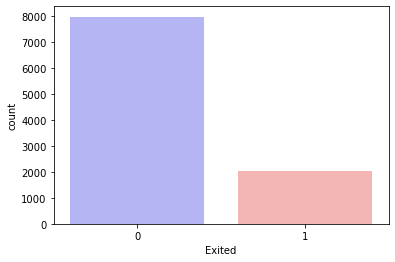

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Exited", data=df, palette="bwr")
plt.show()

In [16]:
# 将某些特征转换为数值类型的哑变量
a = pd.get_dummies(df['ProductsNo'], prefix = "PN")
b = pd.get_dummies(df['City'], prefix = "City")
c = pd.get_dummies(df['Gender'], prefix = "Gender")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,...,Exited,PN_1,PN_2,PN_3,PN_4,City_Beijing,City_Shanghai,City_Tianjin,Gender_Female,Gender_Male
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,...,0,0,1,0,0,1,0,0,1,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,...,0,0,1,0,0,1,0,0,0,1
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,...,1,1,0,0,0,1,0,0,1,0
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,...,1,0,1,0,0,0,0,1,1,0
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,...,1,0,0,1,0,0,0,1,0,1


In [17]:
df = df.drop(columns=['ProductsNo', 'City', "Gender", "Name"])
df.head()

,Age,Tenure,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited,PN_1,PN_2,PN_3,PN_4,City_Beijing,City_Shanghai,City_Tianjin,Gender_Female,Gender_Male
0,40,9,0,1,516,6360.66,0.0000,0,0,1,0,0,1,0,0,1,0
1,69,6,0,1,682,28605.00,0.0000,0,0,1,0,0,1,0,0,0,1
2,32,9,1,1,803,10378.09,236311.0932,1,1,0,0,0,1,0,0,1,0
3,37,0,1,1,778,25564.01,129909.8079,1,0,1,0,0,0,0,1,1,0
4,55,4,1,0,547,3235.61,136976.1948,1,0,0,1,0,0,0,1,0,1


In [18]:
# 构建特征和标签集
y = df.Exited.values
X = df.drop(['Exited'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [20]:
# 进行特征缩放
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标

In [22]:
from sklearn.linear_model import LogisticRegression # 逻辑回归模型
from sklearn.metrics import f1_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = lr.score(X_test, y_test)*100 # 准确率
lr_f1 = f1_score(y_test, y_pred) * 100 # F1分数
print("逻辑回归测试集准确率：{:.2f}%".format(lr_acc))
print("逻辑回归测试集F1分数：{:.2f}%".format(lr_f1))
print("逻辑回归测试集混淆矩阵：\n", confusion_matrix(y_test, y_pred))

逻辑回归测试集准确率：84.15%
逻辑回归测试集F1分数：49.60%
逻辑回归测试集混淆矩阵：
 [[1527   56]
 [ 261  156]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier # 导入KNN算法
k = 5 # 设定初始K值为5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = knn.score(X_test, y_test) * 100 # 准确率
knn_f1 = f1_score(y_test, y_pred) * 100 # F1分数
print("{}NN 预测准确率：{:.2f}%".format(k, knn_acc))
print("{}NN 预测F1分数：{:.2f}%".format(k, knn_f1))
print("KNN测试集混淆矩阵：\n", confusion_matrix(y_test, y_pred))

5NN 预测准确率：81.65%
5NN 预测F1分数：43.80%
KNN测试集混淆矩阵：
 [[1490   93]
 [ 274  143]]


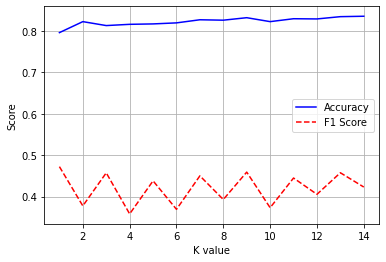

Maximum kNN Score is 47.23%


In [24]:
# 寻找最佳K值
f1_score_list = []
acc_score_list = []
for i in range(1, 15): # 从1到15，尝试每一个K值
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(X_train, y_train)
    acc_score_list.append(kNN.score(X_test, y_test))
    y_pred = kNN.predict(X_test)
    f1_score_list.append(f1_score(y_test, y_pred))
index = np.arange(1, 15, 1)
# 绘制不同K值时，kNN的准确率和F1分数
plt.plot(index, acc_score_list, c='blue', linestyle='solid')
plt.plot(index, f1_score_list, c='red', linestyle='dashed')
plt.legend(["Accuracy", "F1 Score"])
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid('false')
plt.show()
kNN_acc = max(f1_score_list)*100
print("Maximum kNN Score is {:.2f}%".format(kNN_acc))

In [25]:
from sklearn.svm import SVC # 导入SVM分类器
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_acc = svm.score(X_test, y_test) * 100
svm_f1 = f1_score(y_test, y_pred) * 100
print("SVM预测准确率：{:.2f}%".format(svm_acc))
print("SVM预测F1分数：{:.2f}%".format(svm_f1))
print("SVM测试集混淆矩阵：\n", confusion_matrix(y_test, y_pred))

SVM预测准确率：84.45%
SVM预测F1分数：46.66%
SVM测试集混淆矩阵：
 [[1553   30]
 [ 281  136]]


In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = nb.score(X_test, y_test) * 100
nb_f1 = f1_score(y_test, y_pred) * 100
print("朴素贝叶斯测试集准确率：{:.2f}%".format(nb_acc))
print("朴素贝叶斯测试集F1分数：{:.2f}%".format(nb_f1))
print("朴素贝叶斯混淆矩阵：\n", confusion_matrix(y_test, y_pred))

朴素贝叶斯测试集准确率：81.35%
朴素贝叶斯测试集F1分数：22.13%
朴素贝叶斯混淆矩阵：
 [[1574    9]
 [ 364   53]]


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = dt.score(X_test, y_test) * 100
dt_f1 = f1_score(y_test, y_pred) * 100
print("决策树测试集准确率:: {:.2f}%".format(dt_acc))
print("决策树测试集F1分数: {:.2f}%".format(dt_f1))
print('决策树混淆矩阵:\n', confusion_matrix(y_test,y_pred))

决策树测试集准确率:: 81.30%
决策树测试集F1分数: 54.94%
决策树混淆矩阵:
 [[1398  185]
 [ 189  228]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_acc = rfc.score(X_test, y_test) * 100
rfc_f1 = f1_score(y_test, y_pred) * 100
print("随机森林 预测准确率:: {:.2f}%".format(rfc_acc))
print("随机森林 预测F1分数: {:.2f}%".format(rfc_f1))
print('随机森林 混淆矩阵:\n', confusion_matrix( y_test,y_pred))

随机森林 预测准确率:: 86.00%
随机森林 预测F1分数: 58.46%
随机森林 混淆矩阵:
 [[1523   60]
 [ 220  197]]


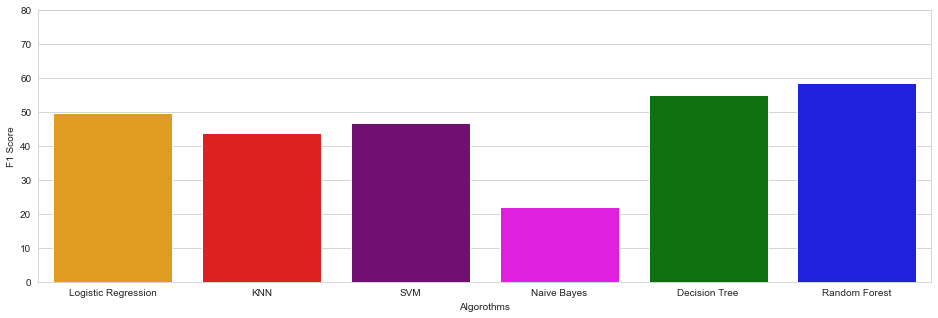

In [30]:
# 用直方图显示出各个算法的F1分数
import seaborn as sns
methods = ["Logistic Regression", "KNN", "SVM",
                    "Naive Bayes", "Decision Tree", "Random Forest"]
f1 = [lr_f1, knn_f1, svm_f1, nb_f1, dt_f1, rfc_f1]
colors = ["orange", "red", "purple", "magenta", "green", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylim((0, 80))
plt.ylabel("F1 Score")
plt.xlabel("Algorothms")
sns.barplot(x=methods, y=f1, palette=colors)
plt.show()

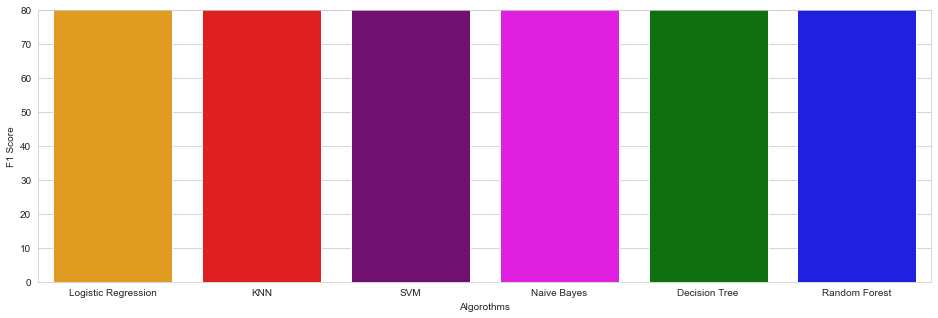

In [31]:
# 用直方图显示出各个算法的预测准确率
import seaborn as sns
methods = ["Logistic Regression", "KNN", "SVM",
                    "Naive Bayes", "Decision Tree", "Random Forest"]
acc = [lr_acc, knn_acc, svm_acc, nb_acc, dt_acc, rfc_acc]
colors = ["orange", "red", "purple", "magenta", "green", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylim((0, 80))
plt.ylabel("F1 Score")
plt.xlabel("Algorothms")
sns.barplot(x=methods, y=acc, palette=colors)
plt.show()